#Import libraries include scikit-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

#import data

In [42]:
# define path to  Data folders
originalDataPath= r'C:\Users\user\nycpayrollanalysis\02 Data\originaldata'
preparedDataPath= r'C:\Users\user\nycpayrollanalysis\02 Data\prepareddata'

In [4]:
goodcols=["Work Location Borough","employee_id"]
df=pd.read_csv(os.path.join(preparedDataPath,'payroll_clean.csv'))

In [5]:
df.head()

,Unnamed: 0,Fiscal Year,Payroll Number,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,employee_id
0,0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,emgiazxy
1,1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,qcekinkp
2,2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,vihcvktl
3,3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,ototwwxb
4,4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,oskpiihm


#Determine variables and Hypothesis statement to test
#regular hours vs. ot hours

if regular hours increase then ot hours will increase.

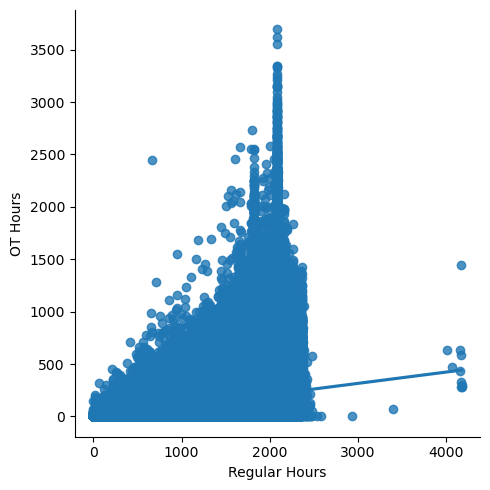

In [6]:
sns.lmplot(x = 'Regular Hours', y = 'OT Hours', data = df)

#Observation: there are extreme values in Regular Hours

sns.distplot(df['Regular Hours'], bins=25

C:\Users\user\AppData\Local\Temp\ipykernel_15620\4259385426.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Regular Hours'], bins=25)


<Axes: xlabel='Regular Hours', ylabel='Density'>

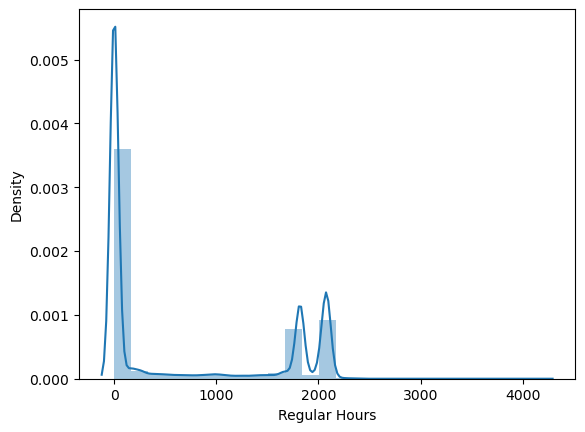

In [9]:
sns.distplot(df['Regular Hours'], bins=25)

In [11]:
df['Regular Hours'].describe()

count    4.915337e+06
mean     6.705228e+02
std      8.886410e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.820000e+03
max      4.171430e+03
Name: Regular Hours, dtype: float64

In [22]:
#subset to remove extreme values (Regular Hours > 2800)
df=df[df['Regular Hours'] < 2800]

In [23]:
df['Regular Hours'].describe()

count    4.915325e+06
mean     6.705147e+02
std      8.886269e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.820000e+03
max      2.584000e+03
Name: Regular Hours, dtype: float64

#output of describe function shows the extreme values have been removed

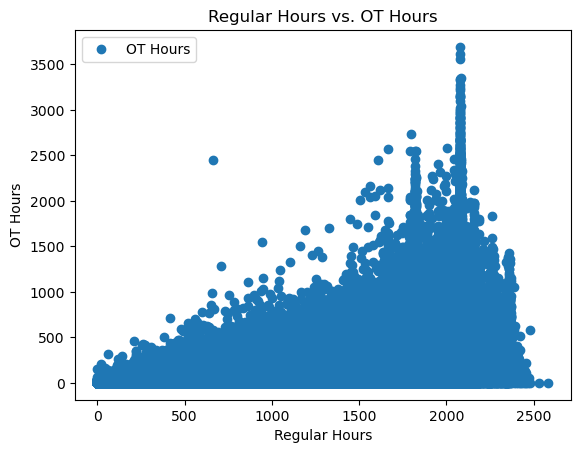

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Regular Hours', y='OT Hours',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Regular Hours vs. OT Hours')  
plt.xlabel('Regular Hours')  
plt.ylabel('OT Hours')  
plt.show()

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Regular Hours'].values.reshape(-1,1)
y = df['OT Hours'].values.reshape(-1,1)

In [26]:
X

array([[1820.  ],
       [1820.  ],
       [1820.  ],
       ...,
       [  22.25],
       [1820.  ],
       [ 672.  ]])

In [27]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.10806139]]
Mean squared error:  18446.804109761266
R2 score:  0.3332708639739651


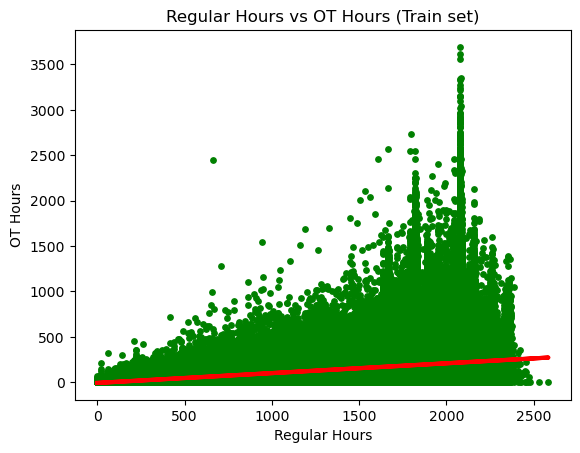

In [41]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Regular Hours vs OT Hours (Train set)')
plot_test.xlabel('Regular Hours')
plot_test.ylabel('OT Hours')
plot_test.show()

In [31]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

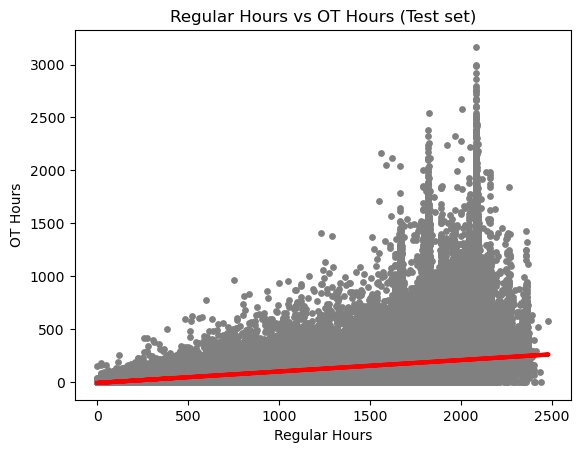

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Regular Hours vs OT Hours (Test set)')
plot_test.xlabel('Regular Hours')
plot_test.ylabel('OT Hours')
plot_test.show()

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.10806139]]
Mean squared error:  18483.073057139703
R2 score:  0.33244636153330487


In [35]:
y_predicted

array([[35.97317561],
       [-7.945133  ],
       [-7.945133  ],
       ...,
       [-7.945133  ],
       [-7.945133  ],
       [-7.945133  ]])

In [43]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.00,35.973176
1,0.00,-7.945133
2,0.00,-7.945133
3,0.00,-7.945133
4,0.00,-7.945133
5,0.00,-7.945133
6,0.00,-7.945133
7,0.00,-7.945133
8,0.00,12.124028
9,0.00,-7.945133


# Interpretation of outcome

1 - Based on the r-square value of the training set, the relationship between Regular Hours and OT Hours is mildly positive at 0.33.
However, this is one of the most positive relationships between variables in this data set.  So, generally speaking, as an employees regular hours worked increases there is a likelyhood that their overtime hours will increase too.

2- Comparing Scatterplots between training group and test group.  
These two scatterplots appear almost identical.  The only observable difference visually is that the peaks of OT Hours in the training set appear a bit higher than the peaks in the test set.

3- Comparing the R-square value between training group and test group.
Both groups have almost identical R-squares at 0.33.
This indicates that the training population is very good at modeling the total population and therefore, any future populations that need to be measured.  It is not overfit and specific to just the training set.

4- Predicting future values.
Given that the correlation is only 0.33, this model is not very good a predicting future values.  There is large variance between the actual and predicted values.  This means there are other variables that have a bigger impact on number of OT Hours than just number of Regular Hours.   Regular Hours is a contributing factor, but additional regression analysis with other variables will have to be conducted in order to find a better predictive model.